# Timeseries view

In [1]:
# Add project path
import sys
PATH = "/mnt/Storage/Projects/CosmicDance"
sys.path.append(PATH)

In [2]:
from cosmic_dance.dst_index import *
from cosmic_dance.io import *
from cosmic_dance.stack_plots import *
from cosmic_dance.TLEs import *

## Dst index timeseries

1. Old Dst index source: https://github.com/sanghaisubham/Analyzing-DST-Index.git
2. Solar storms: https://en.wikipedia.org/wiki/List_of_solar_storms

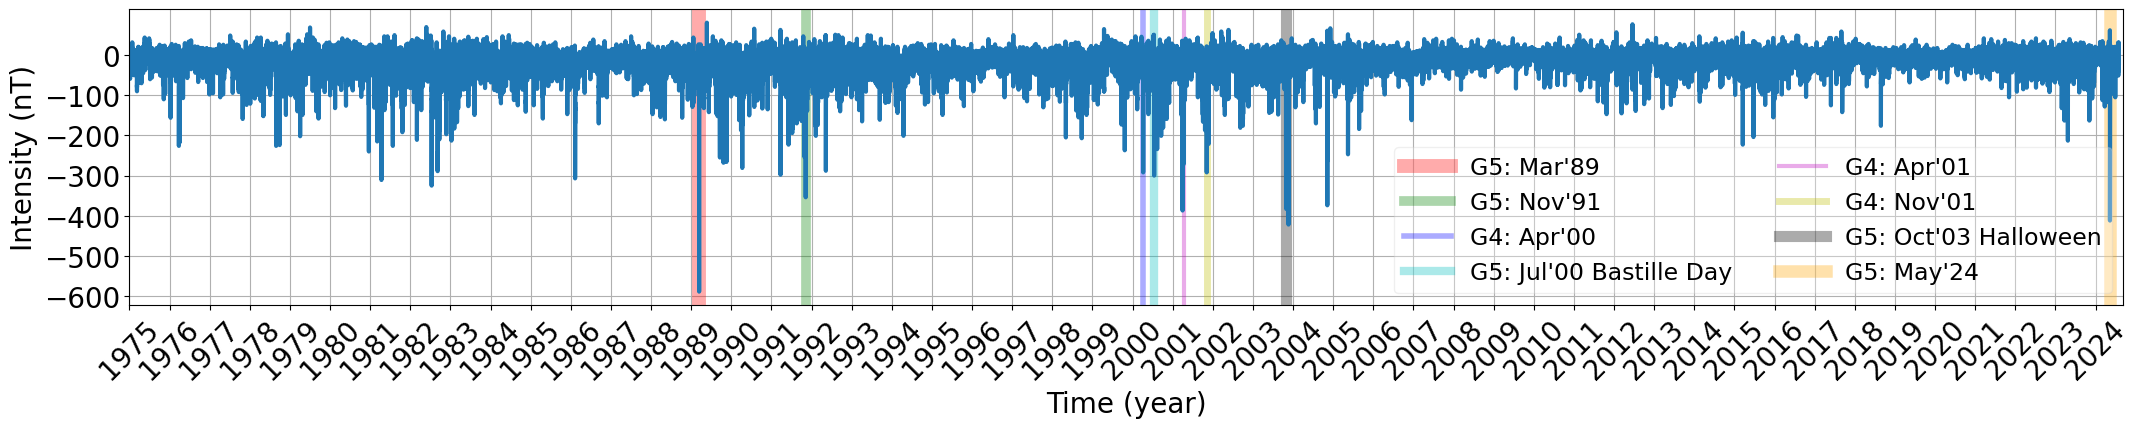

In [6]:
plt.rcParams["figure.figsize"] = (22, 5)
plt.rcParams.update({'font.size': 20})

df = read_dst_index_CSV("../../artifacts/DST/Dst_index_archive.csv", abs_value=False)


fig, axs = plt.subplots(1, 1, sharex=True)

# Storm records
storm_records = [
    # March 1989 geomagnetic storm (−589 nT)
    {
        "qDate": pd.Timestamp('1989-03-11 00:00:00'),
        "label": "G5: Mar'89",
        "color": "r",
        "nT": 589
    },

    # November 1991 (−354 nT)
    {
        "qDate": pd.Timestamp('1991-11-09 00:00:00'),
        "label": "G5: Nov'91",
        "color": "g",
        "nT": 354
    },


    # 2000 April (−288 nT)
    {
        "qDate": pd.Timestamp('2000-04-07 00:00:00'),
        "label": "G4: Apr'00",
        "color": "b",
        "nT": 288
    },

    # 2000 Bastille Day (−301 nT)
    {
        "qDate": pd.Timestamp('2000-07-15 00:00:00'),
        # "label": "G5: Jul'00\nBastille Day",
        "label": "G5: Jul'00 Bastille Day",
        "color": "c",
        "nT": 301
    },


    # 2001 April (-271 nT)
    {
        "qDate": pd.Timestamp('2001-04-12 00:00:00'),
        "label": "G4: Apr'01",
        "color": "m",
        "nT": 271
    },

    # 2001 November (-292 nT)
    {
        "qDate": pd.Timestamp('2001-11-06 00:00:00'),
        "label": "G4: Nov'01",
        "color": "y",
        "nT": 292
    },


    # 2003 Halloween solar storms (-383 nT)
    {
        "qDate": pd.Timestamp('2003-10-31 00:00:00'),
        # "label": "G5: Oct'03\nHalloween",
        "label": "G5: Oct'03 Halloween",
        "color": "k",
        "nT": 383
    },

    # 2024 10–11 May (−412 nT)
    {
        "qDate": pd.Timestamp('2024-05-11 00:00:00'),
        "label": "G5: May'24",
        "color": "orange",
        "nT": 412
    },
]

intensities = [storm_record["nT"] for storm_record in storm_records]
intensities.sort()

for storm_record in storm_records:
    axs.axvline(
        x=storm_record["qDate"],
        color=storm_record["color"],
        linestyle='-',
        alpha=0.33,
        linewidth=intensities.index(storm_record["nT"])+3,
        label=storm_record["label"],
    )

axs.plot(df[DST.TIMESTAMP], df[DST.NANOTESLA], linewidth=3)




axs.set_xticks([
    pd.Timestamp(f'{y}-01-01 00:00:00')
    for y in range(1975, 2025)
])
axs.set_xticklabels(axs.get_xticks(), rotation=45)

axs.set_xlabel('Time (year)')
axs.set_ylabel('Intensity (nT)')

axs.set_yticks([0, -100, -200, -300, -400, -500, -600])
axs.set_xlim(pd.Timestamp('1975-01-01 00:00:00'),
             pd.Timestamp('2024-09-10 00:00:00'))

axs.grid()
axs.legend(ncol=2, framealpha=0.3, prop={'size': 17})
filename = '/mnt/Storage/Projects/CosmicDance/figures/timeseries/DstIndexLast50_1.png'
# axs.legend(ncol=1, framealpha=0.3, prop={'size': 17}, bbox_to_anchor=(1, 1))
# filename = '/mnt/Storage/Projects/CosmicDance/figures/timeseries/DstIndexLast50_2.png'

plt.tight_layout()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.savefig(filename,dpi=300)
plt.show()

## View all params

In [3]:
df_tles = get_merged_TLEs_from_all_CSVs('../../artifacts/OUTPUT/Starlink/TLEs')

# Query the first launch of Starlink
LDATE = pd.to_datetime("11-11-2019")
df_tles = df_tles[df_tles[TLE.LAUNCH_DATE] == LDATE]

# Remove one outlier inclination close to 0 degree
df_tles = df_tles[df_tles[TLE.INCLINATION] > 1]

 Reading 100.0%  


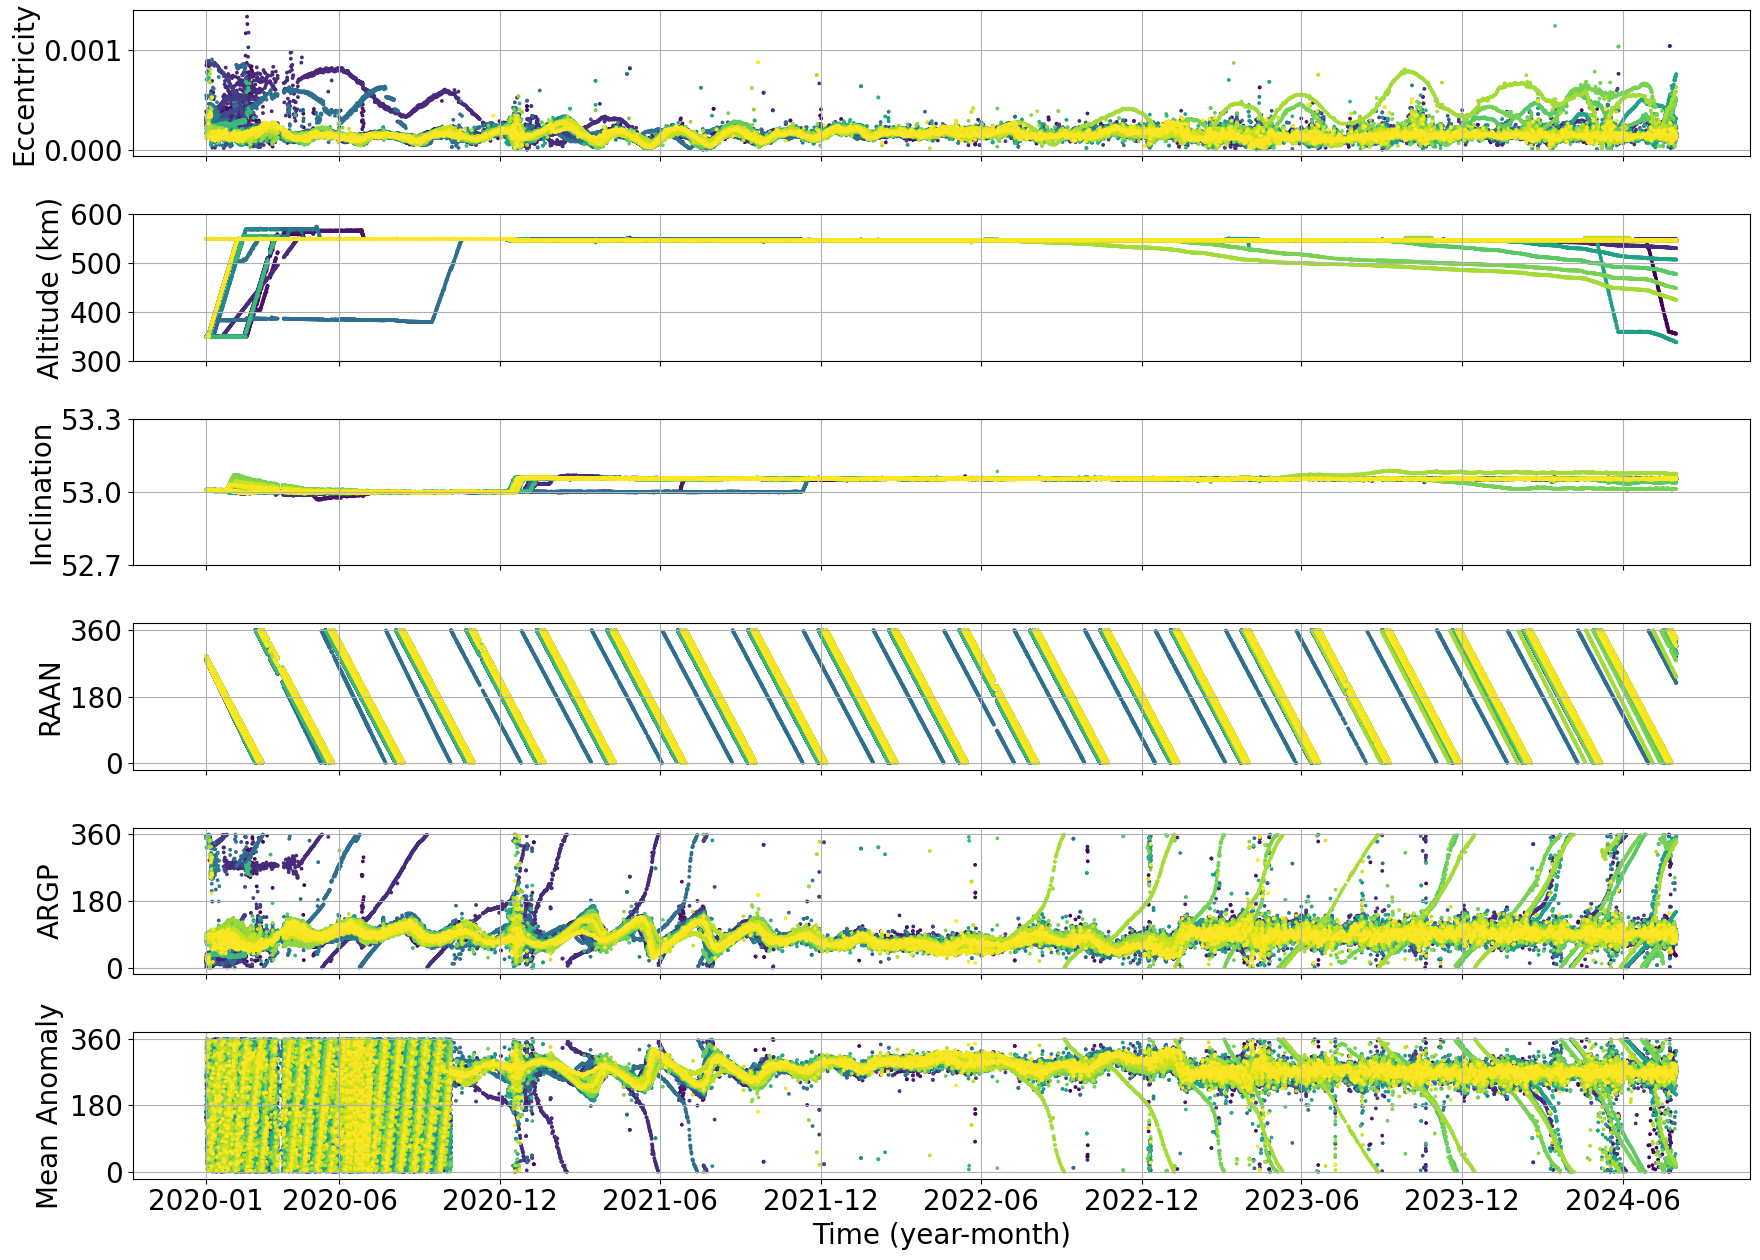

In [4]:
plt.rcParams["figure.figsize"] = (18, 13)
plt.rcParams.update({'font.size': 20})

fig, axs = plt.subplots(6, 1, sharex=True)

# Eccentricity
axs[0].scatter(
    df_tles[TLE.EPOCH], df_tles[TLE.ECCENTRICITY],
    c=df_tles[TLE.NORAD_CAT_ID],
    s=3,
)
# Mean Motion
axs[1].scatter(
    df_tles[TLE.EPOCH], df_tles[TLE.ALTITUDE_KM],
    c=df_tles[TLE.NORAD_CAT_ID],
    s=3,
)
# Inclination
axs[2].scatter(
    df_tles[TLE.EPOCH], df_tles[TLE.INCLINATION],
    c=df_tles[TLE.NORAD_CAT_ID],
    s=3,
)
# Right Ascension of Ascending Node
axs[3].scatter(
    df_tles[TLE.EPOCH], df_tles[TLE.RAAN],
    c=df_tles[TLE.NORAD_CAT_ID],
    s=3,
)
# Argument of Perigees
axs[4].scatter(
    df_tles[TLE.EPOCH], df_tles[TLE.ARGP],
    c=df_tles[TLE.NORAD_CAT_ID],
    s=3,
)
# Mean Anomaly
axs[5].scatter(
    df_tles[TLE.EPOCH], df_tles[TLE.MEAN_ANOMALY],
    c=df_tles[TLE.NORAD_CAT_ID],
    s=3,
)


axs[-1].set_xticks(
    [
        pd.to_datetime('2020-01-01'),
        pd.to_datetime('2020-06-01'),
        pd.to_datetime('2020-12-01'),
        pd.to_datetime('2021-06-01'),
        pd.to_datetime('2021-12-01'),
        pd.to_datetime('2022-06-01'),
        pd.to_datetime('2022-12-01'),
        pd.to_datetime('2023-06-01'),
        pd.to_datetime('2023-12-01'),
        pd.to_datetime('2024-06-01'),
    ],
    minor=False
)


axs[-1].set_xlabel('Time (year-month)')
axs[0].set_ylabel('Eccentricity')
axs[1].set_ylabel('Altitude (km)')
axs[2].set_ylabel('Inclination')
axs[3].set_ylabel('RAAN')
axs[4].set_ylabel('ARGP')
axs[5].set_ylabel('Mean Anomaly')


# axs[1].set_ylim(300,600)
# axs[3].set_ylim(0,365)
# axs[4].set_ylim(0,365)
# axs[5].set_ylim(0,365)

axs[1].set_yticks([300, 400, 500, 600], minor=False)
axs[2].set_yticks([53-.3, 53, 53+.3], minor=False)
axs[3].set_yticks([0, 180, 360], minor=False)
axs[4].set_yticks([0, 180, 360], minor=False)
axs[5].set_yticks([0, 180, 360], minor=False)

for i in range(6):
    axs[i].grid()

plt.tight_layout()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# plt.savefig("/home/suvam/Projects/CosmicDance/figures/timeseries/lifetime.png",dpi=300)
plt.show()

## Satellite starts decay

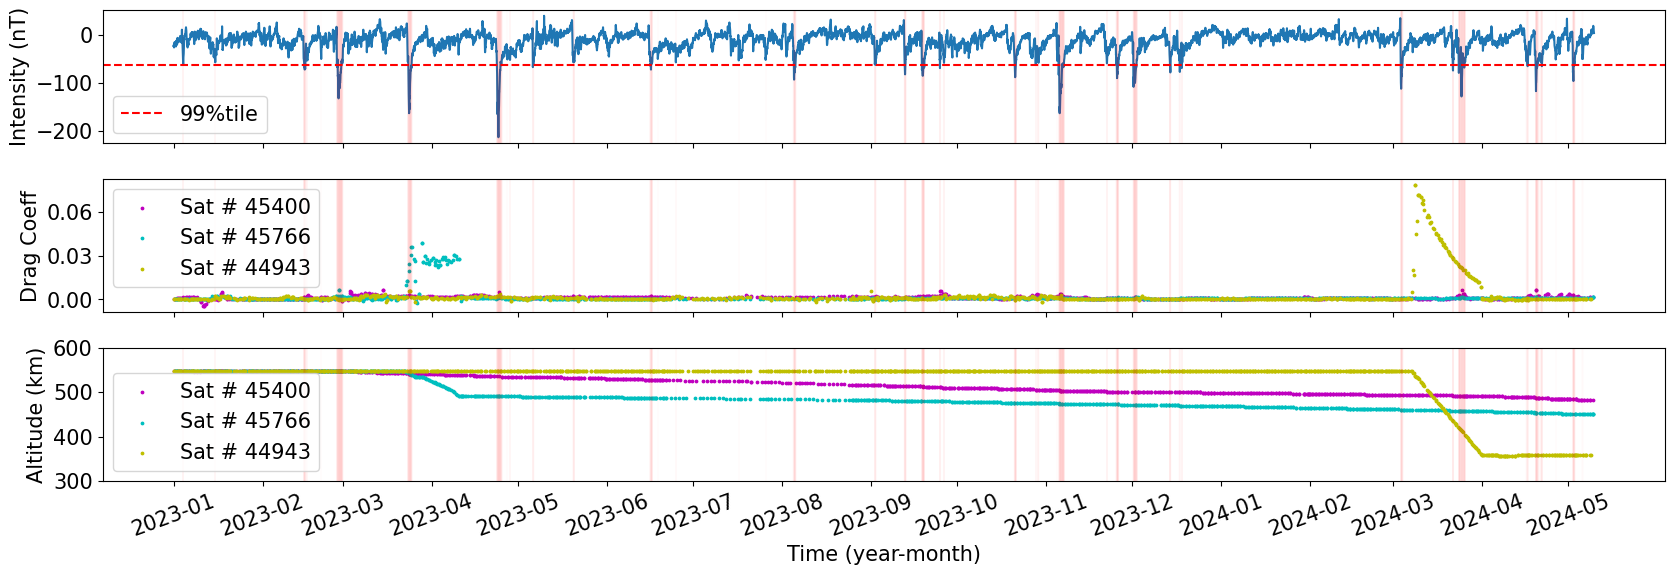

In [7]:
# Dataset
START_DATE = pd.to_datetime('2023-01-01')
END_DATE = pd.to_datetime('2024-05-10')

CAT_ID_1 = 45766
CAT_ID_2 = 45400
CAT_ID_3 = 44943

# Reading TLEs
TLE_DIR = "../../artifacts/OUTPUT/Starlink/TLEs"


df_tles_1 = get_all_TLE_between_two_date(read_TLEs_in_CSV(
    f"{TLE_DIR}/{CAT_ID_1}.csv"), START_DATE, END_DATE)
df_tles_2 = get_all_TLE_between_two_date(read_TLEs_in_CSV(
    f"{TLE_DIR}/{CAT_ID_2}.csv"), START_DATE, END_DATE)
df_tles_3 = get_all_TLE_between_two_date(read_TLEs_in_CSV(
    f"{TLE_DIR}/{CAT_ID_3}.csv"), START_DATE, END_DATE)


# Reading DST index
df_dst = read_dst_index_CSV("../../artifacts/DST/Dst_index.csv", abs_value=False)
df_dst = get_Dst_in_range(df_dst, START_DATE, END_DATE)


# Params
plt.rcParams["figure.figsize"] = (17, 6)
plt.rcParams.update({'font.size': 15})


# Plotting
fig, axs = plt.subplots(3, 1, sharex=True)

# DST
axs[0].plot(
    df_dst[DST.TIMESTAMP], df_dst[DST.NANOTESLA],
    # label='nT'
)
axs[0].axhline(
    y=-63.0,
    color='r',
    linestyle='--',
    label=f'{99}%tile'
)
for nt, t in zip(df_dst[DST.NANOTESLA], df_dst[DST.TIMESTAMP]):
    if -50.0 >= nt:
        # print(nt)
        axs[0].axvline(x=t, color='r', linestyle='-', alpha=0.01)
        axs[1].axvline(x=t, color='r', linestyle='-', alpha=0.01)
        axs[2].axvline(x=t, color='r', linestyle='-', alpha=0.01)

# DRAG
axs[1].scatter(
    df_tles_2[TLE.EPOCH], df_tles_2[TLE.DRAG],
    label=f'Sat # {CAT_ID_2}',
    s=3,
    c='m'
)
axs[1].scatter(
    df_tles_1[TLE.EPOCH], df_tles_1[TLE.DRAG],
    label=f'Sat # {CAT_ID_1}',
    s=3,
    c='c'
)
axs[1].scatter(
    df_tles_3[TLE.EPOCH], df_tles_3[TLE.DRAG],
    label=f'Sat # {CAT_ID_3}',
    s=3,
    c='y'
)



# Altitude

axs[2].scatter(
    df_tles_2[TLE.EPOCH], df_tles_2[TLE.ALTITUDE_KM],
    label=f'Sat # {CAT_ID_2}',
    s=3,
    c='m'
)
axs[2].scatter(
    df_tles_1[TLE.EPOCH], df_tles_1[TLE.ALTITUDE_KM],
    label=f'Sat # {CAT_ID_1}',
    s=3,
    c='c'
)
axs[2].scatter(
    df_tles_3[TLE.EPOCH], df_tles_3[TLE.ALTITUDE_KM],
    label=f'Sat # {CAT_ID_3}',
    s=3,
    c='y'
)


# Scaling and marking
axs[-1].set_xticks(
    [
        pd.to_datetime('2023-01-01'),
        pd.to_datetime('2023-02-01'),
        pd.to_datetime('2023-03-01'),
        pd.to_datetime('2023-04-01'),
        pd.to_datetime('2023-05-01'),
        pd.to_datetime('2023-06-01'),
        pd.to_datetime('2023-07-01'),
        pd.to_datetime('2023-08-01'),
        pd.to_datetime('2023-09-01'),
        pd.to_datetime('2023-10-01'),
        pd.to_datetime('2023-11-01'),
        pd.to_datetime('2023-12-01'),
        pd.to_datetime('2024-01-01'),
        pd.to_datetime('2024-02-01'),
        pd.to_datetime('2024-03-01'),
        pd.to_datetime('2024-04-01'),
        pd.to_datetime('2024-05-01')
    ],
    minor=False
)
axs[-1].set_xticklabels(axs[-1].get_xticks(), rotation=20)
axs[-1].set_xlabel('Time (year-month)')
axs[0].set_ylabel('Intensity (nT)')
axs[1].set_ylabel('Drag Coeff')
axs[2].set_ylabel('Altitude (km)')

axs[0].legend()
axs[1].legend()
axs[2].legend()
    

axs[0].set_yticks([0, -100, -200], minor=False)
axs[1].set_yticks([0.0, 0.03, 0.06], minor=False)
axs[2].set_yticks([300, 400, 500, 600], minor=False)
    
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.show()